In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

C:\Users\ambik\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
# Converting the dataset (60000, 28, 28) into a flattend array of size (1,28,28) 
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [6]:
x_train=x_train.astype(float)
x_test=x_test.astype(float)

In [11]:
# One hot encoding Target variables
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [7]:
x_test.dtype

dtype('float64')

In [8]:
# Define and design neural network model
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout
#from tensorflow.keras import regularizers
weight_decay=1e-4

model=models.Sequential()

model.add(Conv2D(filters=10, kernel_size=(3, 3),strides=(1, 1), padding ='valid'))
# RELu layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(45, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [9]:
# Compiling Model
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics =['accuracy'])

In [12]:
history=model.fit(x_train, y_train_ohe, epochs=12, batch_size=1000, validation_split= 0.1, validation_data=(x_test, y_test_ohe))

Epoch 1/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.4083 - loss: 21.9559 - val_accuracy: 0.6612 - val_loss: 0.9591
Epoch 2/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.6746 - loss: 0.9666 - val_accuracy: 0.8053 - val_loss: 0.6028
Epoch 3/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.8116 - loss: 0.6462 - val_accuracy: 0.8910 - val_loss: 0.4268
Epoch 4/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.8750 - loss: 0.4812 - val_accuracy: 0.9207 - val_loss: 0.3330
Epoch 5/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.9052 - loss: 0.3683 - val_accuracy: 0.9327 - val_loss: 0.2771
Epoch 6/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.9212 - loss: 0.3212 - val_accuracy: 0.9427 - val_loss: 0.2515
Epoch 7/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.9344 - loss: 0.2641 - val_accuracy: 0.9491 - val_loss: 0.2168
Epoch 8/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.9442 - loss: 0.2275 - val_accuracy: 0.9570 - 

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (1000, 26, 26, 10)          │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (1000, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (1000, 25, 25, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (1000, 25, 25, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (1000, 6250)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (1000, 45)                  │         281,295 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (1000, 10)                  │             460 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 845,567 (3.23 MB)

 Trainable params: 281,855 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 563,712 (2.15 MB)

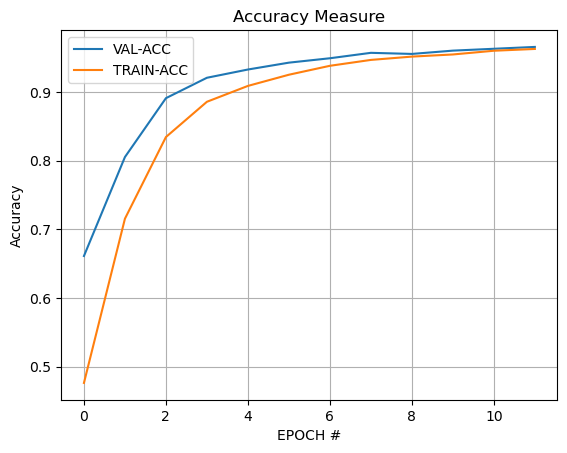

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])

plt.legend(['VAL-ACC', 'TRAIN-ACC'])
plt.title("Accuracy Measure")
plt.xlabel("EPOCH #")
plt.ylabel("Accuracy")
#plt.xticks(ticks = range(0,30), labels = range(1,31))
plt.grid()
plt.show()

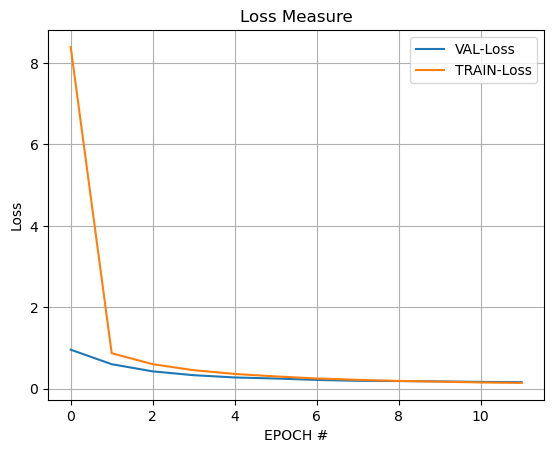

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

plt.legend(['VAL-Loss', 'TRAIN-Loss'])
plt.title("Loss Measure")
plt.xlabel("EPOCH #")
plt.ylabel("Loss")
# plt.xticks(ticks = range(0,30), labels = range(1,31))
plt.grid()
plt.show()